In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/data/wb_lifexpec.csv')

In [3]:
d.describe()

,year,Azerbaijan,China,Ireland,Mali,Thailand,United States,Zimbabwe
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1989.000000,69.231356,68.219203,77.627492,44.396797,70.376542,78.008475,56.439949
std,17.175564,3.200572,9.096243,3.804051,9.294390,6.965974,2.532839,5.831832
min,1960.000000,64.168000,45.191000,71.707000,29.026000,57.059000,73.100000,44.846000
25%,1974.500000,66.989000,64.948000,74.208500,36.470500,64.476500,76.250000,52.934500
50%,1989.000000,68.714000,70.819000,77.498000,46.039000,73.160000,78.500000,58.364000
75%,2003.500000,70.956500,74.386000,80.900000,51.433500,75.175000,79.900000,60.980500
max,2018.000000,75.336000,79.051000,84.100000,59.649000,80.704000,81.300000,63.746000


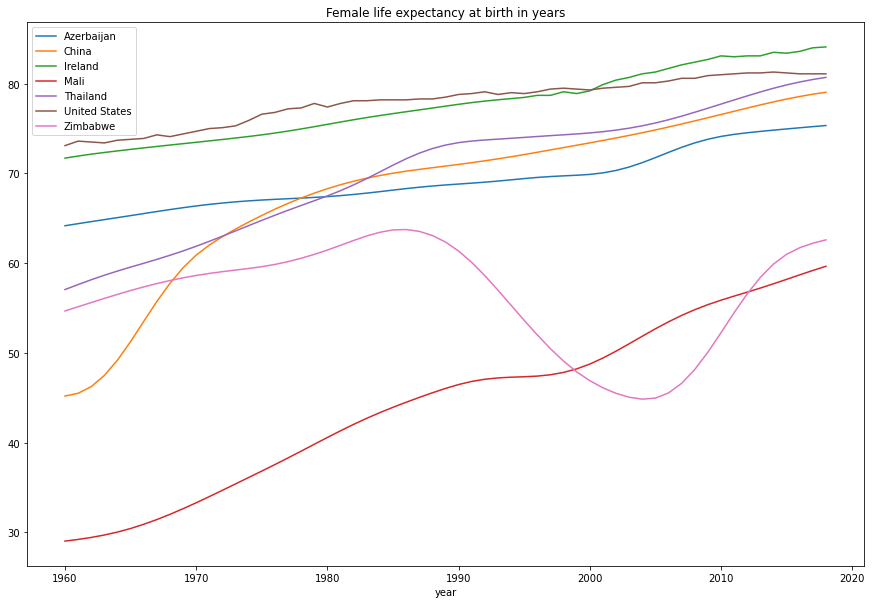

In [4]:
d.plot(x = 'year', kind='line', figsize = (15, 10), title = 'Female life expectancy at birth in years')

plt.savefig('images/wb_lifexpec.jpeg')

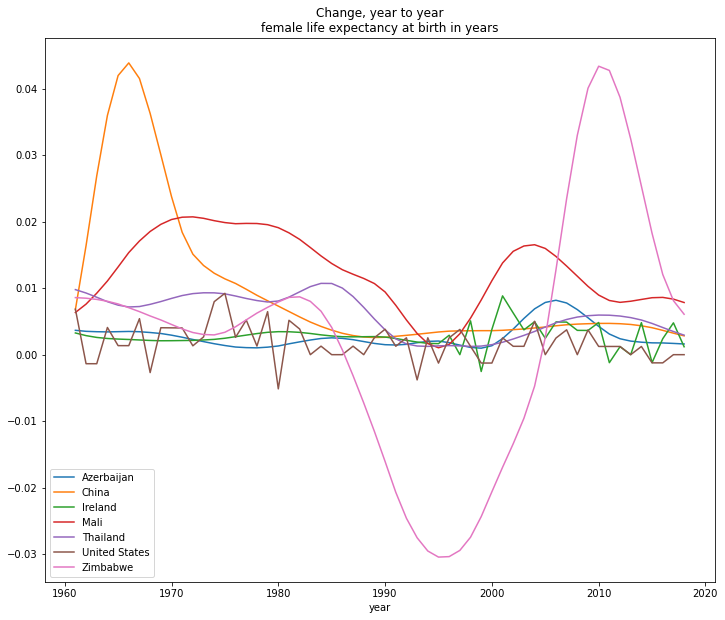

In [5]:
# instead of 
# d.loc[:, d.columns != 'year']
# could do 
# d.drop(columns = 'year')

d.loc[:, d.columns != 'year'].pct_change().join(d.year).plot(x = 'year', kind = 'line', figsize = (12, 10), title = 'Change, year to year\nfemale life expectancy at birth in years')

plt.savefig('images/wb_lifexpec_chg.jpeg')

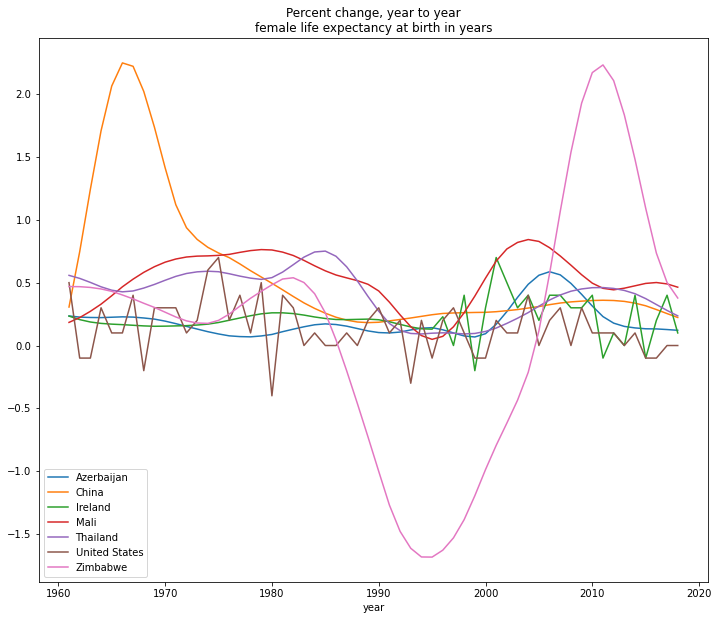

In [6]:
d.drop(columns = 'year').diff().join(d.year).plot(x = 'year', kind = 'line', figsize = (12, 10), title = 'Percent change, year to year\nfemale life expectancy at birth in years')

plt.savefig('images/wb_lifexpec_chg_pct.jpeg')

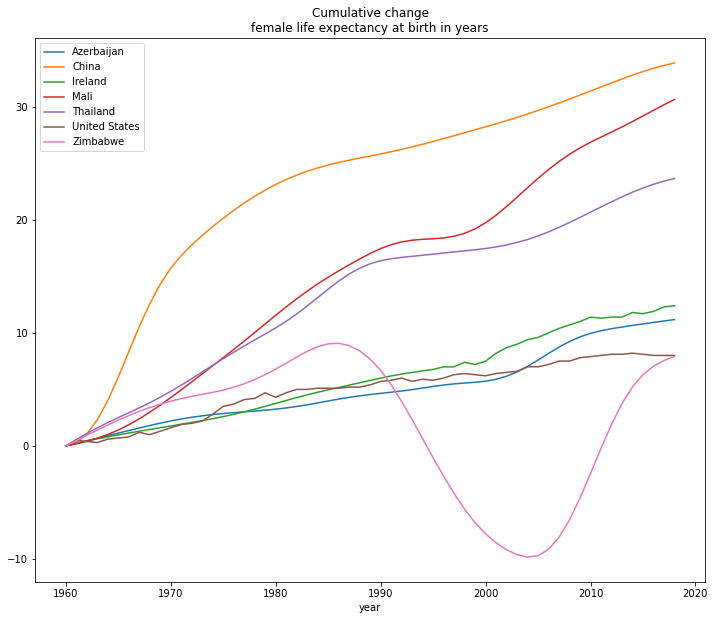

In [7]:
# cumulative change
# could also d.loc[:, d.columns != 'year'].diff().join(d.year).cumsum()

ddiff = d.drop(columns = 'year') - d.drop(columns = 'year').loc[0]
ddiff.join(d.year).plot(x = 'year', kind = 'line', figsize = (12, 10), title = 'Cumulative change\nfemale life expectancy at birth in years')

plt.savefig('images/wb_lifexpec_cumulative.jpeg')

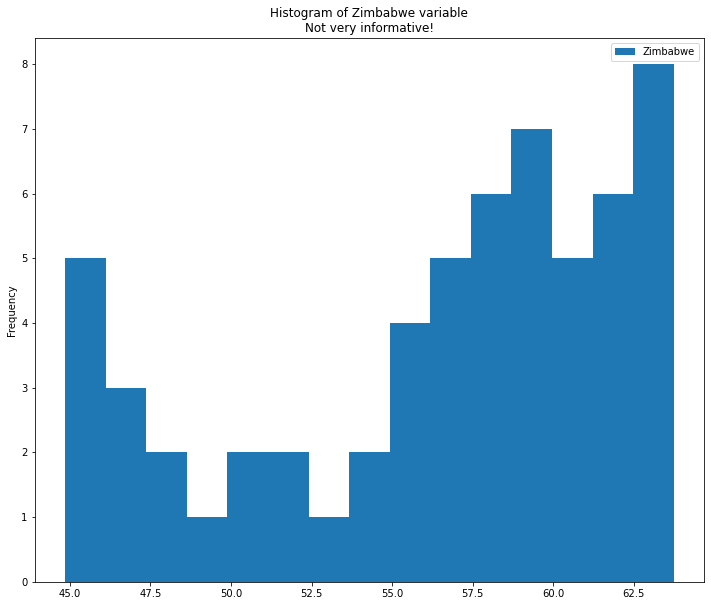

In [8]:
# cumulative change
# could also d.loc[:, d.columns != 'year'].diff().join(d.year).cumsum()

d.plot(y = 'Zimbabwe', kind = 'hist', bins = 15, figsize = (12, 10), title = 'Histogram of Zimbabwe variable\nNot very informative!')

plt.savefig('images/wb_lifexpec_histzimb.jpeg')

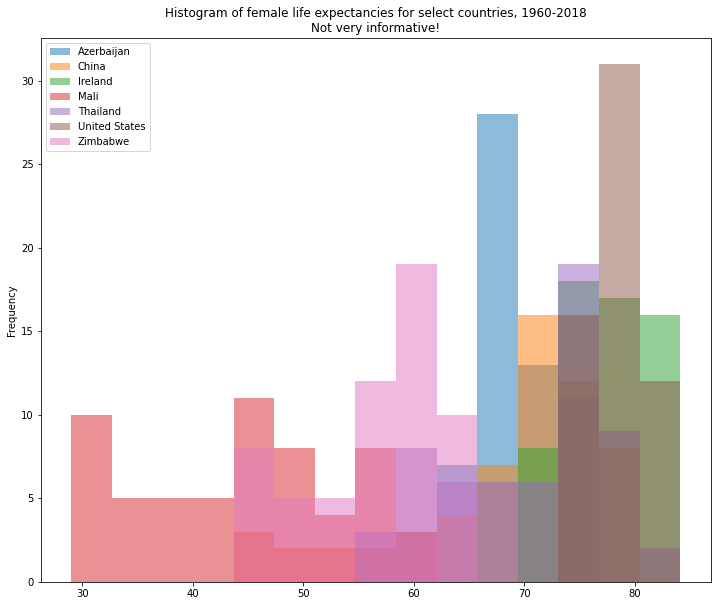

In [9]:
# cumulative change
# could also d.loc[:, d.columns != 'year'].diff().join(d.year).cumsum()

d.drop(columns = 'year').plot(kind = 'hist', bins = 15, alpha = .5, figsize = (12, 10), title = 'Histogram of female life expectancies for select countries, 1960-2018\nNot very informative!')

plt.savefig('images/wb_lifexpec_histogram.jpeg')

<AxesSubplot:xlabel='United States', ylabel='China'>

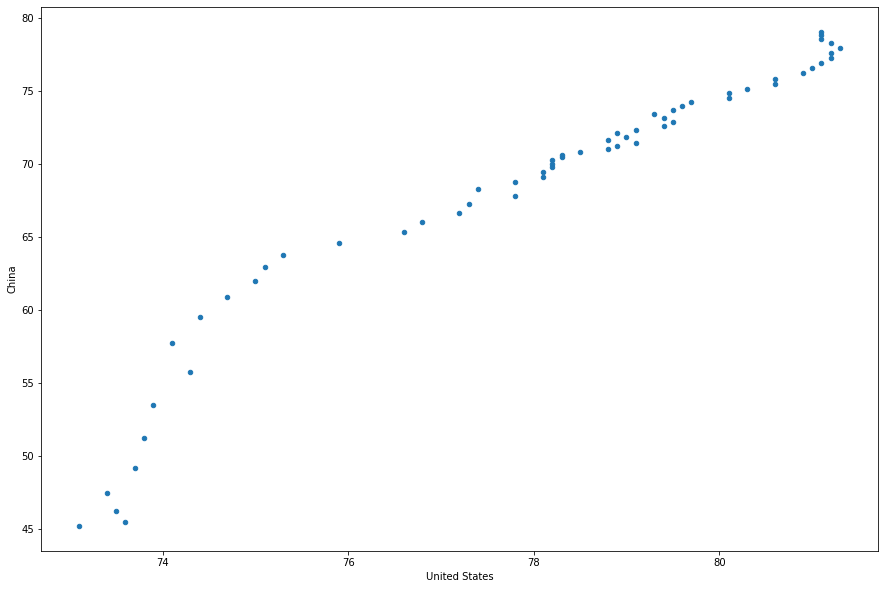

In [10]:
d.plot(x = 'United States', y = 'China', kind = 'scatter', figsize = (15, 10))

In [11]:
nlast = d.shape[0] - 1
d.apply(lambda x: x[nlast] - x[0])

year             58.000
Azerbaijan       11.168
China            33.860
Ireland          12.393
Mali             30.623
Thailand         23.645
United States     8.000
Zimbabwe          7.926
dtype: float64

In [12]:
pd.DataFrame([d.apply(lambda x: x[nlast] - x[0]), d.apply(lambda x: (x[nlast] - x[0])/x[0])], 
             index = ['change_yr', 'change_pct']).drop(columns = 'year')

,Azerbaijan,China,Ireland,Mali,Thailand,United States,Zimbabwe
change_yr,11.168000,33.860000,12.393000,30.62300,23.645000,8.000000,7.926000
change_pct,0.174043,0.749264,0.172828,1.05502,0.414396,0.109439,0.144974


In [13]:
# or do this slightly more concisely with
d.drop(columns = 'year').apply(lambda x: [x[nlast] - x[0], (x[nlast] - x[0])/x[0]], result_type = 'expand')

,Azerbaijan,China,Ireland,Mali,Thailand,United States,Zimbabwe
0,11.168000,33.860000,12.393000,30.62300,23.645000,8.000000,7.926000
1,0.174043,0.749264,0.172828,1.05502,0.414396,0.109439,0.144974
